# Automatas celulares 1D

Primero se cargan las librerias, módulos, que se requieren

In [1]:
from numpy import arange, zeros
from numpy.random import random, seed
from math import pow
import matplotlib.pyplot as plt

# Funcion para la configuracion inicial

Se define el numero de columnas y si se coloca un bit en uno en el centro o se genera una configuracion aleatoria.

In [2]:
def ACinicial(centro, columnas):
    ACvacio = zeros([filas, columnas])
    # Coloca un bit en 1 en el centro del autómata
    if centro == True:
        col = (columnas / 2) + 1
        ACvacio[0,int(col)]= 1    
    else:
        # Coloca aleatoriamente varios bits en 1 en autómata 
        for fila in arange(0, 1):
            for col in arange(0, columnas):
                if random() < 0.5:
                    estado = 1  
                else:
                    estado = 0 
                ACvacio[fila, col] = estado
                
    return ACvacio

In [3]:
def diccionario_reglas(numero_regla):
    patron_dic = {}
    patron_list = ['000','001','010','011','100','101','110','111']
    # Construye el diccionario de reglas.
    for exponente in range(7, -1, -1):
        if numero_regla >= pow(2, exponente):
            patron_dic[patron_list[exponente]] = 1
            numero_regla = numero_regla - pow(2, exponente)
        else:
            patron_dic[patron_list[exponente]] = 0
    return patron_dic

In [4]:
def simulacion(ACvacio, filas, columnas):
    for fila in arange(0, filas - 1):
        for col in arange(0, columnas):
            estado = ACvacio[fila, col]      
            patron_celda = str(int(ACvacio[fila, col - 1])) \
                        + str(int(ACvacio[fila, col])) \
                        + str(int(ACvacio[fila, (col + 1) % columnas]))
            estado = patron_dic[patron_celda]
            ACvacio[fila + 1, col] = estado    
    return ACvacio

In [5]:
seed()
probability_of_black = 0.5
filas = 100
columnas = 101

In [9]:
regla = 30

patron_dic = diccionario_reglas(regla)
print(patron_dic.items()) #prints keys and values
centro = False

dict_items([('111', 0), ('110', 0), ('101', 0), ('100', 1), ('011', 1), ('010', 1), ('001', 1), ('000', 0)])


In [10]:
#ACvacio = ACinicial(ACinicial, centro, columnas) 
ACvacio = ACinicial(centro, columnas)
ACvacio = simulacion(ACvacio,filas, columnas) 

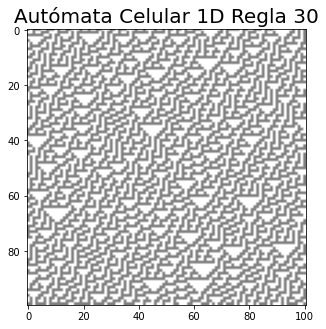

In [11]:
fig1 = plt.figure(figsize = (5, 8))
plt.imshow(ACvacio, vmin = 0, vmax = 2, cmap = 'binary')
plt.axis('image')
plt.title('Autómata Celular 1D Regla ' + str(regla), fontsize = 20)
plt.show()